# Breast Tumor Classification using Three Machine Learning Methods

## 1- Summary
The aim of this work is to classify breast tumors as malignant and benign. The clinical data contain 30 features of breast tumors and include the information of 569 participants. The features were obtained from digitized images of a fine needle aspiration of breast masses which contain information of the cell nuclei. The tumor data have been labeled as malignant and beneign therefore a supervised learning method is utilized. It is a classification case as the prediction is not a numeric value. Three supervised learning methods, i.e. support vector machine, logistic-regression, and k-nearest neighbor, were used to classify the data into two groups of malignant and benign. The goal is to compare these algorithms and find the algorithm with the highest recall value for the malignant samples.

The data were divided into test and training sets. Twenty percent of the data was randomly selected and used for test. In the evaluation phase, the training data was split into 10 folds, without shuffling, to optimize the accuracy of each model on the training data set. To do that, each fold was used once for cross-validation while the other 9 remaining folds made the training set. The logistic regression method showed the highest accuracy amongst the three methods. This method accuraty predicted 97.4 % of malignant tumors of the test group. This method also showed the highest accuracy, i.e. 94.7 %, among the three methods on the training group. In the following, each section of the code is described and results and discussion are presented. The data was obtained from Kaggle [1]. 

## 2- Importing libraries and packages
The following libraries and packages were imported and used in the analysis.

Libraries: SciKit-Learn, numpy, pandas, and matplotlib 

Packages: matplotlib (pyplot), sklearn (model_selection, classification_report, accuracy_score, confusion_matrix, LogisticRegression, SVC, KNeighborsClassifier)

In [1]:
# importing libraries
import sys
import numpy as np
import sklearn 
import pandas as pd
import matplotlib

In [2]:
# printing the version of libraries

print('python: {}'.format(sys.version))
print('numpy: {}'.format(np.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('panda: {}'.format(pd.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

python: 3.6.1 (v3.6.1:69c0db5, Mar 21 2017, 17:54:52) [MSC v.1900 32 bit (Intel)]
numpy: 1.13.0
sklearn: 0.20.3
panda: 0.24.2
matplotlib: 2.1.2


In [3]:
# importing packages

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## 3- Importing and understanding data
The features include information on the cell nuclei of the breast mass taken by fine needle aspiration. The data is imported.
Then, its shape and some values are printed to be reviewed. The data set includes sample id, diagnosis (malignant or benign), and 30 features for each sample. The diagnosis data is used for classification (output Y). The data set includes information on 569 cases. A description of the data including mean, min, max, 25%, 50%, and 75% values are shown to better understand features characteristics. The data set includes 357 malignant and 212 benign samples.

In [4]:
#importing data
path = "./data.csv"
data=pd.read_csv(path)

In [5]:
# data shape, data head
print(data.shape)
data.head()

(569, 32)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
# describing data
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [7]:
# distribution 
print(data.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


## 4- Data visualization
The histogram of all features is plotted to understand the data set feature distribution as normal, right-skewed, left-skewed, uni-modal, bi-modal, and multi-modal. Additionally, a scatter matrix-plot are plotted to see the potential correlation between different features (co-linearity). 

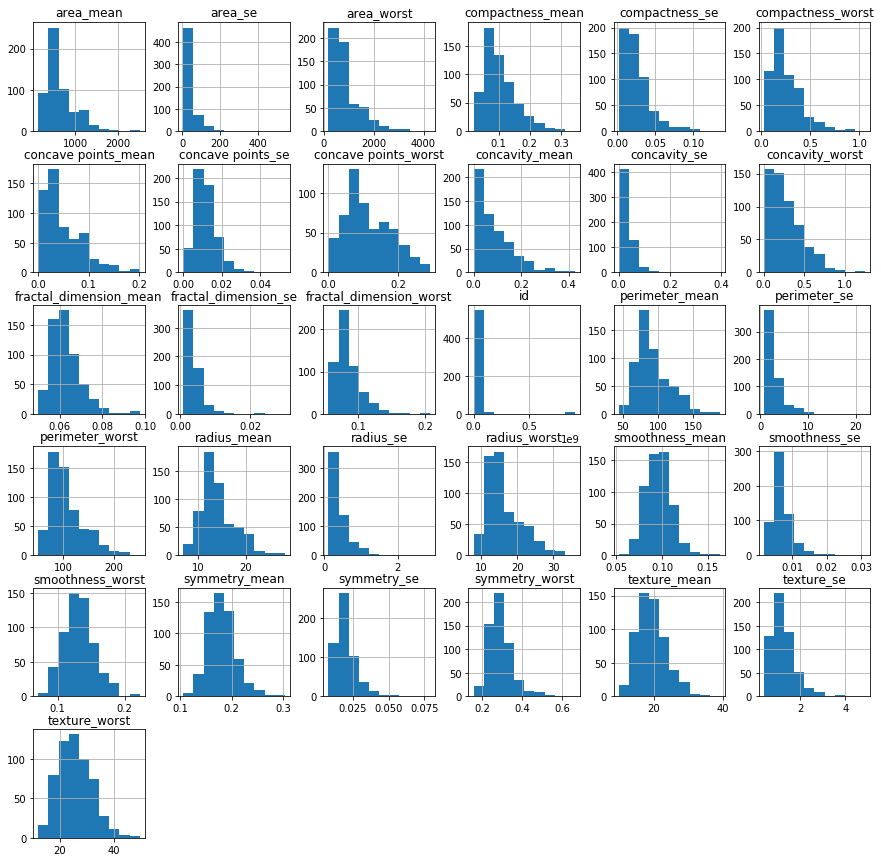

In [8]:
#histogram
#changing default setting for all plots
plt.rcParams['figure.figsize'] = [15, 15]
data.hist()
plt.show()

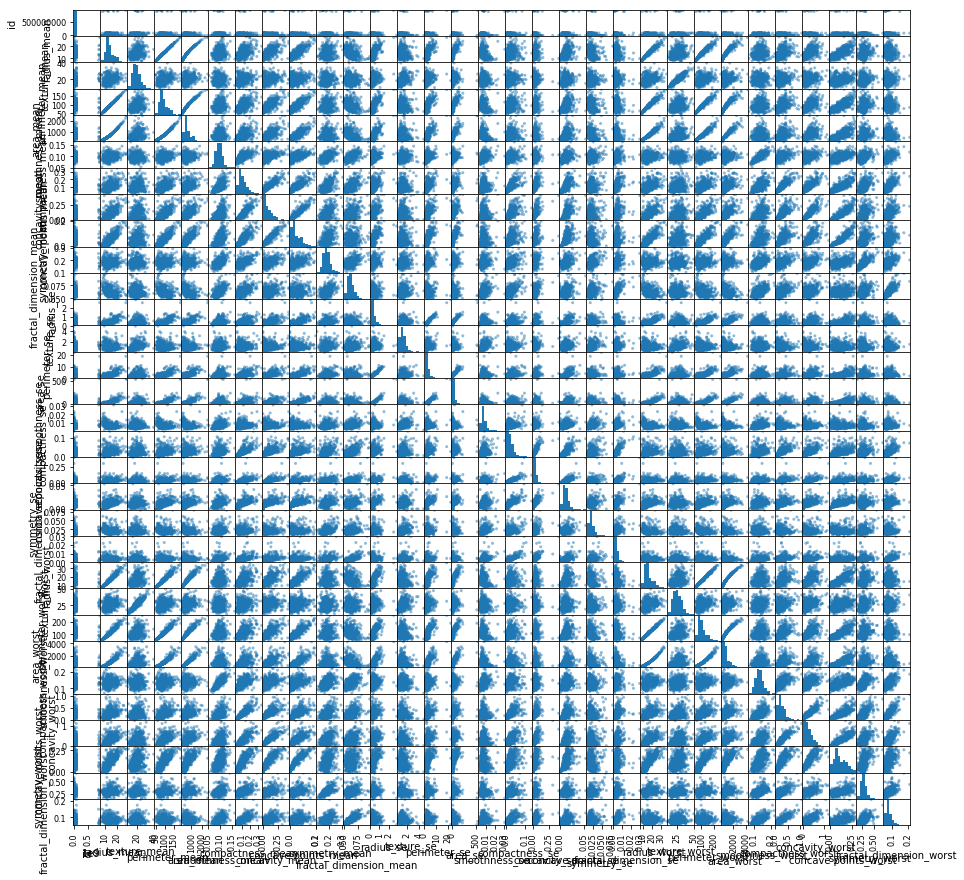

In [9]:
# scatter plot matrix
scatter_matrix(data)
plt.show()

## 5- Data extraction, Training and Test set definitions
Features (X) and output (Y) are extracted from the imported data. The data are split into training (80%) and test (20%) sets.


In [10]:
# extracting X, Y 

array=data.values
X=array[:,2:]
Y=array[:,1]
print(X)
print(Y)

[[17.99 10.38 122.8 ..., 0.2654 0.4601 0.1189]
 [20.57 17.77 132.9 ..., 0.18600000000000003 0.275 0.08902]
 [19.69 21.25 130.0 ..., 0.243 0.3613 0.08757999999999999]
 ..., 
 [16.6 28.08 108.3 ..., 0.1418 0.2218 0.0782]
 [20.6 29.33 140.1 ..., 0.265 0.4087 0.124]
 [7.76 24.54 47.92 ..., 0.0 0.2871 0.07039]]
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B

In [11]:
# spliting data to test and training
seed_s=5
validation_size=0.2
X_train, X_validation, Y_train, Y_validation=model_selection.train_test_split(X,Y,
                                                                              test_size=validation_size, random_state=seed_s)

## 6- Model selection, Model option, Evaluation Phase
Three models were selected for the classification: support vector machine, logistic-regression, and k-nearest neighbor.
In the evaluation phase, the data were split into 10 folds. Each fold is used once for cross-validation while the algorithms are trained on the other 9 remained folds to obtain the parameters of the algorithms. Finally, the accuracy of the models on the training set are compared showing that the logistic-regression has the highest accuracy among the three groups on the training set.

In [16]:
# model options
seed_t=5
scoring_t='accuracy'

In [13]:
# 3 selected models for comparisons
models=[]
models.append(('LR',LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM',SVC(gamma='auto')))

In [14]:
# evaluation phase including cross-validation (k_fold)

results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed_t)
    cv_results=model_selection.cross_val_score(model,X_train, Y_train, cv=kfold,scoring=scoring_t)
    results.append(cv_results)
    names.append(name)
    display_msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(display_msg)

LR: 0.947005 (0.053701)
KNN: 0.925024 (0.040135)
SVM: 0.638986 (0.079075)


## 7- Prediction 
In the prediction phase, the training data are fit to models to obtain the parameters. Then, the predicted outputs for the test set are compared to the diagnosis to obtain the precision, recall, f-score of the models. The logistic regression outperforms the other models with a recall value of 96% for malignant sample meaning that the model has identified 96% of the malignant cases. The model has a precision rate of 98% meaning that 98% of cases precited as malignant are actually malignant and 2% of these samples are normal cases.

In [15]:
# fitting models to all test data & making prediction phase

for name, model in models:
    model.fit(X_train,Y_train)
    prediction=model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation,prediction))
    print(classification_report(Y_validation,prediction))

LR
0.973684210526
              precision    recall  f1-score   support

           B       0.97      0.98      0.98        66
           M       0.98      0.96      0.97        48

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

KNN
0.938596491228
              precision    recall  f1-score   support

           B       0.90      1.00      0.95        66
           M       1.00      0.85      0.92        48

   micro avg       0.94      0.94      0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

SVM
0.578947368421
              precision    recall  f1-score   support

           B       0.58      1.00      0.73        66
           M       0.00      0.00      0.00        48

   micro avg       0.58      0.58      0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg      

c:\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 8- Analysis
In the evaluation phase, the accuracy of the models were obtained for all 10 folds and the mean accuracy of each model, i.e. the accuracy of the whole training group, was reported. The results show that logistic regression and k-nearest neighbor could classify and predict the malignant samples. Support-vector machine is not a good option for the predictions since this model seems to under-fit the data (high bias); however, highper parameter tuning on regularization could help improving its performance (to do for future). 

After the evaluation phase, the models were trained on the whole data set. To examine the model to see if the models can generalize, the parameters obtained were used to predict the outcome of the test set. The precisions of logistic regression and k-nearest neighbor models on the test set show that these models can generalize and do not over-fit or under-fit the data.

The results show that logistic regression outperforms the k-nearest neighbor method. While the k-nearest neighbor has the precision of 100% for malignant cases (98% for the logistic regression), the logistic regression model has a higher recall value (96%) in comparison to the k-nearest neigbor method (85%). The recall value for this analysis is more important than the accuracy since the goal is to find and screen all malignant cases. 


## Reference
[1] Breast Cancer Wisconsin (Diagnostic) Data Set|Kaggle (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)